# Decision Tree and Random Forest Project
for this project we will exploring publicly available data from LendingClub.com. Lending Club connects people who need money(borrowers)
with people who have money(investors). As an investors you would want to invest in people who showed a profile of having a high probability
of paying you back. We will try to create a model that will help predict this.

* So we will try and predict if the **`Loan was fully paid or not`**

**here are what columns represents:**
* credit.policy : 1 if customer meets the credit underwriting criteria, 0 Otherwise
* fico: The Fair Isaac Corporation credit score of the borrower
  

## Libraries and data

In [4]:
#libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
%%HTML
<style type='text/css'>
table.dataframe td, table.dataframe th {border-style: solid}

## Get the Data

In [6]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**check out info() and Describe()**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

**Create a histogram of two FICO vs credit.policy distribution on top of each other**

Text(0.5, 0, 'FICO')

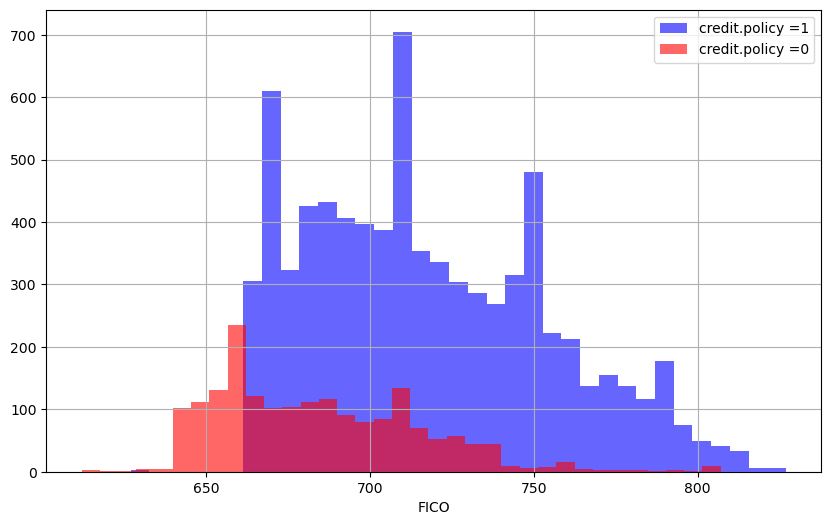

In [9]:
plt.figure(figsize=(10, 6))
df[df['credit.policy']==1]['fico'].hist(bins=35, color='blue', label='credit.policy =1', alpha=0.6)
df[df['credit.policy']==0]['fico'].hist(bins=35, color='RED', label='credit.policy =0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

*Interpretation*

from the visualization we can tell that we have more people in my data sets that have a credit policy equal to one than
a credit policy equal to zero. Based on the FICO score people who tend to have lower FICO score have a credit policy of zero.
Also remember that credit policy equal to one is if the customer meets the credit underwritting criteria of lending club

**Create a histogram of two FICO vs not.fully.paid distribution on top of each other**

Text(0.5, 0, 'FICO')

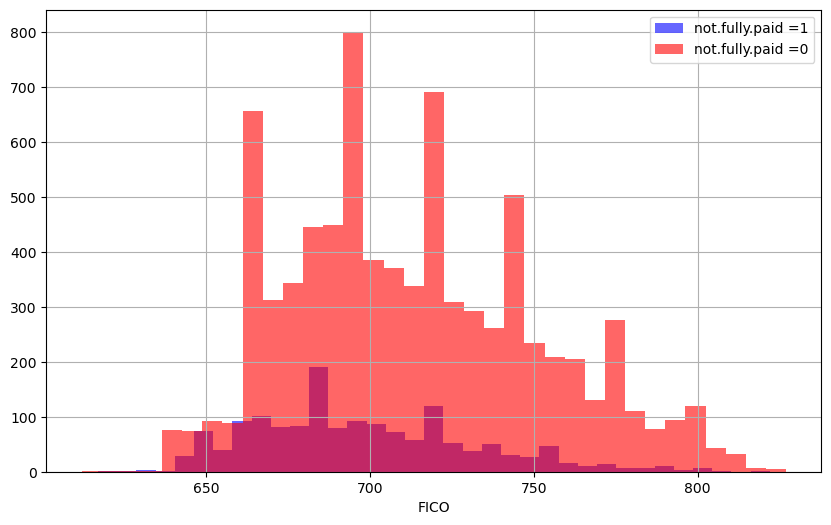

In [10]:
plt.figure(figsize=(10, 6))
df[df['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', label='not.fully.paid =1', alpha=0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins=35, color='RED', label='not.fully.paid =0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

*Interpretation*

from the visualization we can tell that we have more people in my data sets that have a **`not.fully.paid`** equal to one than
a **`not.fully.paid`** equal to zero. This means that majority of people are fully paying off their Loans

**Create a counterplot using seaborn showing the counts of loans by purpose**

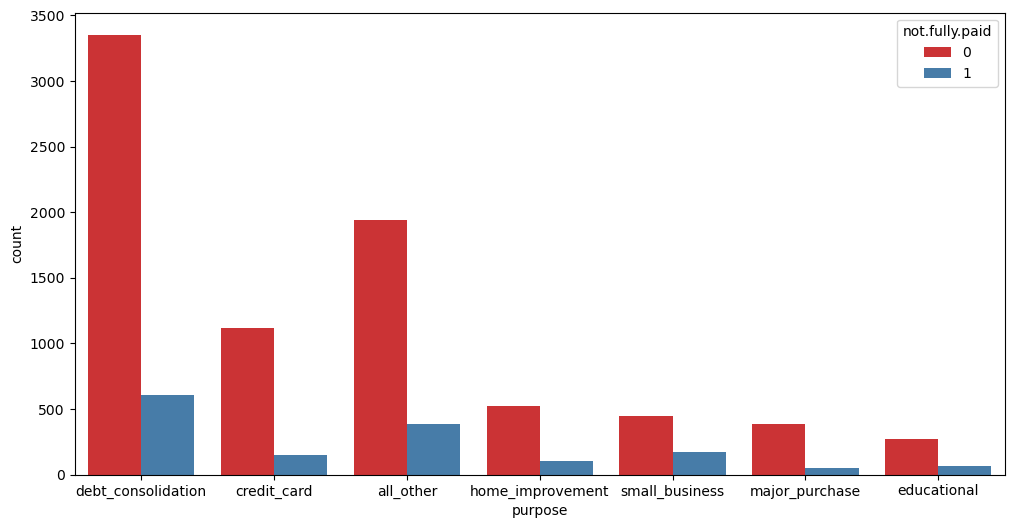

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x= 'purpose', hue='not.fully.paid',palette='Set1')
plt.show()


*Interpretation*

so Just by looking at this plot we can tell that debt_consolidation seems to be the most popular reason why people want a loan and follow 
by Credit card and sor foth, and education being the lowest of them all.
something to note here is that the ratio between **not fully paid and fully paid**, seems to be pretty similar between all the reasons

**Creating a jointplot to see a trend between FICO and interest rate**

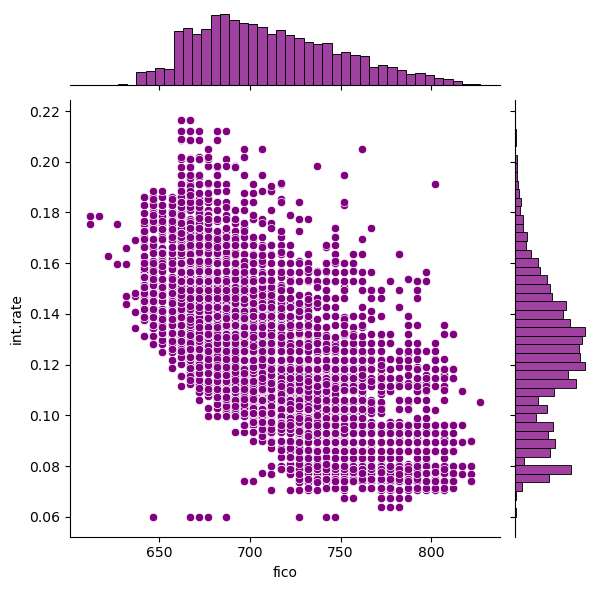

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.jointplot(data=df, x ='fico', y= 'int.rate',color='purple')

*Interpretation*

You can see that as FICO score increases the interest rate you have to pay off the loan tends to decrease which make sense 

**Creating lmplots to see a trend differend between not.fully.paid and credit.policy**

<Figure size 1100x700 with 0 Axes>

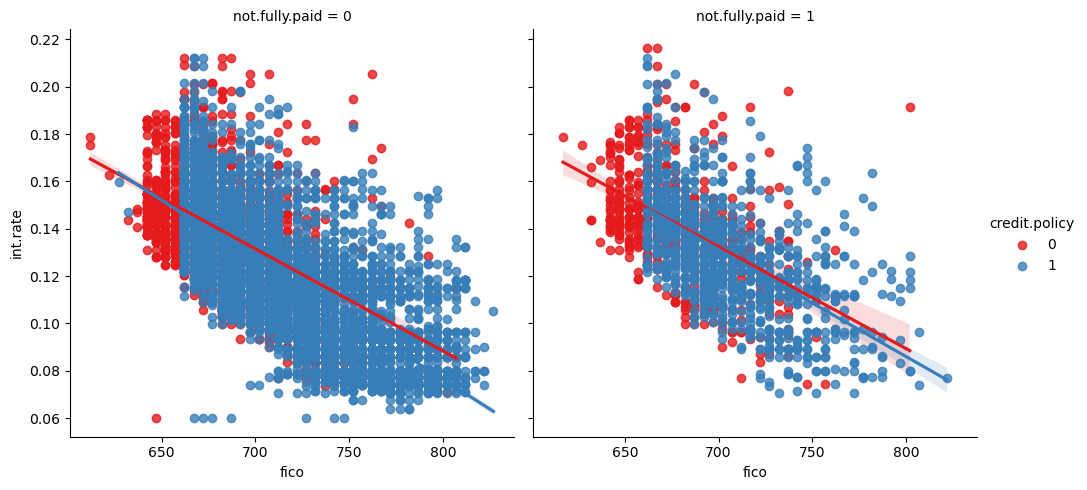

In [12]:
plt.figure(figsize=(11, 7))
sns.lmplot(data=df,x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set1')

*Interpretation*

we can see here that the behaviour is relatively the same whether or not it was fully paid off or on and whether or not they were denied the credit policy

## Setting up the Data

**Creating Dummy variables to fit in the model**

In [36]:
cat_feats = ['purpose']

In [37]:
final_data = pd.get_dummies(df, columns=cat_feats,drop_first=True)

In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# y is the column that we are trying to predict
# X is everything else

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dec_tree = DecisionTreeClassifier()

In [20]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluations of Decision Tree
**Creating prediction from the test set and create a classification report and confusion matrix**

In [21]:
predictions = dec_tree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

**Showing the classification report**

In [43]:
cl_re = classification_report(y_test, predictions)
print(cl_re)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



**Showing the confusion matrix**

In [44]:
co_mtx  = confusion_matrix(y_test, predictions)
print(co_mtx)

[[1991  440]
 [ 341  102]]


## Random Forest classifier
**Now lets create an instance of the RandomForestClassifier class and fit it to our training data to see which one 
will do better between Decision Tree and Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=300)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

### Predictions and Evaluations of Random Forest Classifier

**Creating prediction from the test set and create a classification report and confusion matrix**

In [27]:
rfc_pred = rfc.predict(X_test)

**Showing the classification report**

In [41]:
cl_re_rfc = classification_report(y_test, rfc_pred)
print(cl_re_rfc )

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.41      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



**Showing the confusion matrix**

In [42]:
co_mtx_rfc  = confusion_matrix(y_test, rfc_pred)
print(co_mtx_rfc)

[[2418   13]
 [ 434    9]]


Insights:

Class Imbalance: There is a significant class imbalance, with far more instances of loans that were not fully paid (class 0) compared to those that were fully paid (class 1). This imbalance can heavily influence the model's performance metrics.
Precision and Recall: The model shows high precision for class 0 (85%), indicating that it is good at identifying loans that were not fully paid. However, the recall for class 1 (2%) is extremely low, suggesting that the model struggles to correctly identify loans that were fully paid.
F1-score: The F1-score for class 0 (0.92) is relatively high, indicating a good balance between precision and recall for loans that were not fully paid. However, the F1-score for class 1 (0.04) is very low, highlighting the model's poor performance in predicting loans that were fully paid.
Accuracy: While the overall accuracy is 84%, this metric can be misleading due to the class imbalance. The model's accuracy is mainly driven by its ability to predict class 0 instances 

In summary, while the model performs well in predicting loans that were not fully paid due to the majority class dominance, it struggles significantly in correctly identifying loans that were fully paid, as reflected by low recall and F1-score for class 1. Addressing class imbalance and further model tuning could lead to better predictions for fully paid loans.